$$\text{\Huge Characterization} $$

In [78]:
# Librerie
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.optimize import curve_fit
import seaborn as sns


#FONT (LaTeX, perchè Eli vuole così)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

In [53]:
# ------------------- NO -----------------------------

# x (profondità della sonda) = 40 cm 

MagneticField =   [2.0, 5.2, 8.2, 11.5, 14.9, 18.0, 21.3, 24.2, 27.5, 30.7, 33.9, 37.2, 40.3,] # Gauss -> Errore +/- 0.1 G
Current =         [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, ] # Ampere

# Corrente 1, campo 0 G

In [54]:
# Create a DataFrame with the data
df_Characterization = pd.DataFrame({
    'Corrente' : Current,
    'CampoMagnetico': MagneticField,
})

In [55]:
df_Solenoide

,Corrente,CampoMagnetico
0,1.0,2.0
1,2.0,5.2
2,3.0,8.2
3,4.0,11.5
4,5.0,14.9
5,6.0,18.0
6,7.0,21.3
7,8.0,24.2
8,9.0,27.5
9,10.0,30.7


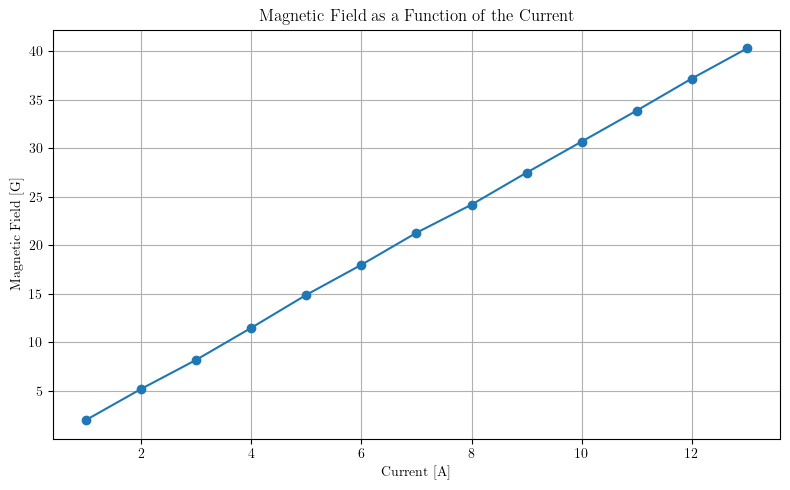

In [56]:
# Plot CampoMagnetico vs Corrente 
plt.figure(figsize=(8, 5))
plt.plot(df_Solenoide['Corrente'], df_Solenoide['CampoMagnetico'], marker='o')
plt.xlabel(r'Current [A]')
plt.ylabel(r'Magnetic Field [G]')
plt.title(r'Magnetic Field as a Function of the Current')
plt.grid(True)
plt.tight_layout()
plt.show()



$$\text{\Large Data} $$

In [57]:
# Data

# x (profondità della sonda) = 40 cm 

MagneticField =   [3.7, 6.8, 10.0, 13.2, 16.4, 19.5 , 22.9, 26.1, 29.3, 32.3, 35.7, 38.8, 42.1, 45.2] # Gauss -> Errore +/- 0.1 G
Current =         [1.0, 2.0, 3.0, 4.0,   5.0,  6.0,   7.0,  8.0,  9.0,  10.0, 11.0, 12.0, 13.0, 14.0] # Ampere

# Corrente 1, campo 0 G

In [58]:
# Create a DataFrame with the data
df_Characterization = pd.DataFrame({
    'Corrente' : Current,
    'CampoMagnetico': MagneticField,
})

In [59]:
df_Characterization

,Corrente,CampoMagnetico
0,1.0,3.7
1,2.0,6.8
2,3.0,10.0
3,4.0,13.2
4,5.0,16.4
5,6.0,19.5
6,7.0,22.9
7,8.0,26.1
8,9.0,29.3
9,10.0,32.3


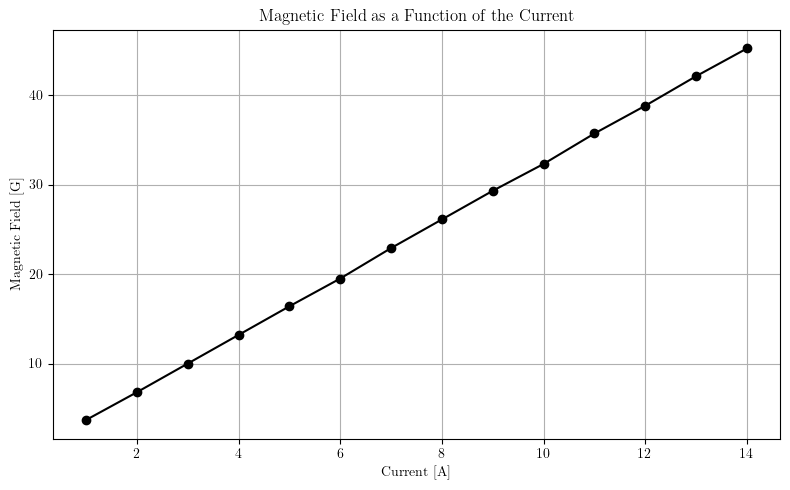

In [61]:
# Plot CampoMagnetico vs Corrente 
plt.figure(figsize=(8, 5))
plt.plot(df_Characterization['Corrente'], df_Characterization['CampoMagnetico'], marker='o', color = 'black')
plt.xlabel(r'Current [A]')
plt.ylabel(r'Magnetic Field [G]')
plt.title(r'Magnetic Field as a Function of the Current')
plt.grid(True)
plt.tight_layout()
plt.show()


$$\text{\Large Linear Fit}  $$

Retta: B = 3.2013 * I + 0.4187
R² = 1.0000


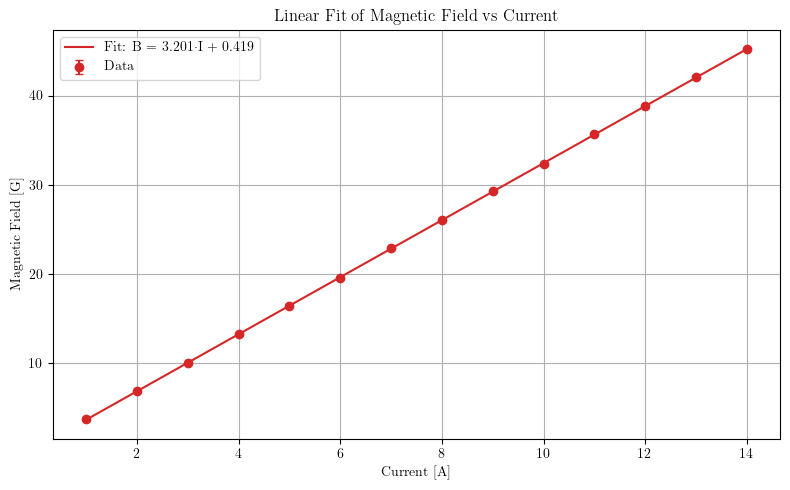

In [172]:
from scipy.stats import linregress

# Errore costante sul campo magnetico
magnetic_field_error = 0.1
yerr = np.full_like(df_Characterization['CampoMagnetico'], magnetic_field_error, dtype=float)

# Fit lineare
slope, intercept, r_value, p_value, std_err = linregress(df_Characterization['Corrente'], df_Characterization['CampoMagnetico'])

# Stampa dei parametri del fit
print(f"Retta: B = {slope:.4f} * I + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")

# Valori fittati
x_fit = df_Characterization['Corrente']
y_fit = slope * x_fit + intercept

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(
    df_Characterization['Corrente'],
    df_Characterization['CampoMagnetico'],
    yerr=yerr,
    fmt='o',
    label='Data',
    color='tab:red',
    capsize=3
)
plt.plot(x_fit, y_fit, '-', label=f'Fit: B = {slope:.3f}·I + {intercept:.3f}', color='tab:red')
plt.xlabel('Current [A]')
plt.ylabel('Magnetic Field [G]')
plt.title('Linear Fit of Magnetic Field vs Current')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


$$\text{\Huge Spatial Uniformity} $$

In [166]:
# ---------------------------- NO ---------------------------------

# Current = 7 A


x =               [40, 32, 24,  16, 8, 0, 4, 
                   40, 32, 24,  16, 8, 0, 4,
                   40, 32, 24,  16, 8, 0, 4, 
                   40, 32, 24,  16, 8, 0, 4, 
                   40, 32, 24,  16, 8, 0, 4, 
                   40, 32, 24,  16, 8, 0, 4, 
                   40, 32, 24,  16, 8, 0, 4,
                   40, 32, 24,  16, 8, 0, 4,
                   40, 32, 24,  16, 8, 0, 4,
                   40, 32, 24,  16, 8, 0, 4, 
                   48, ]       # Asse lungo [cm]  


y =               [0, 0, 0, 0, 0, 0,       0,
                   2, 2, 2, 2,  2, 2,      2, 
                   4, 4, 4, 4, 4, 4,       4,
                   8, 8, 8, 8, 8, 8,       8,
                   12, 12, 12, 12, 12, 12, 12, 
                   16, 16, 16, 16, 16, 16, 16, 
                   20, 20, 20, 20, 20, 20, 20, 
                   24, 24, 24, 24, 24, 24, 24, 
                   26, 26, 26, 26, 26, 26, 26,
                   28, 28, 28, 28, 28, 28, 28, 
                   0, ]       # Asse corto [cm]

MagneticField =   [20.5,       20.6,    21.0, 20.5, 18.0,  10.6, 15.7, 
                   20.5, 20.6,  20.7, 20.4, 17.8, 10.8, 15.7, 
                   20.6, 20.7, 20.4, 20.3, 17.5, 9.8,   15.6, 
                   20.6, 20.6, 20.2, 20.0, 17.3, 9.3,   15.6,  
                   20.6, 20.5, 20.1, 20.0, 17.2, 11.5,  15.7, 
                   20.6, 20.2, 20.1, 20.0, 17.2, 10.6,  15.4, 
                   20.6, 20.5, 20.5, 20.1, 17.3, 10.4,  15.5, 
                   20.6, 20.4, 20.6, 20.1, 17.3, 10.1,  15.6, 
                   20.6, 20.8, 21.0, 20.3, 17.7, 9.0,   15.7, 
                   20.6, 20.7, 21.0, 20.4, 18.0, 10.4,  16.0, 
                   , ]    # Gauss

In [167]:
df_SpatialUniformity = pd.DataFrame({
    'x'             :  x,
    'y'             :  y,
    'CampoMagnetico':  MagneticField,
})

In [168]:
df_SpatialUniformity

,x,y,CampoMagnetico
0,40,0,20.5
1,32,0,20.6
2,24,0,21.0
3,16,0,20.5
4,8,0,18.0
...,...,...,...
66,16,28,20.4
67,8,28,18.0
68,0,28,10.4
69,4,28,16.0


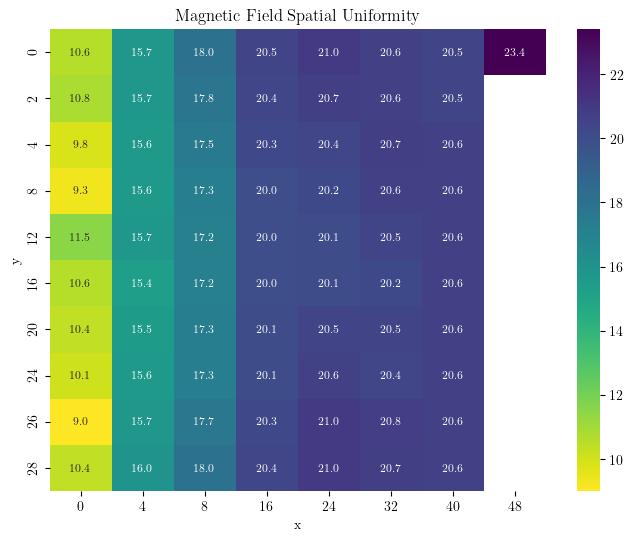

In [171]:
pivot_df = df_SpatialUniformity.pivot(index='y', columns='x', values='CampoMagnetico')

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_df,
    cmap='viridis_r',
    annot=True,
    fmt=".1f",  # Mostra 3 cifre decimali (puoi aumentare se vuoi)
    annot_kws={"size": 8}  # dimensione del testo
)
plt.title('Magnetic Field Spatial Uniformity')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



$$\text{\Large Dati "giusti"} $$

In [237]:
# Current = 7 A


x =               [8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   8, 16, 24, 32, 40, 48, 56, 64, 72, 76, 80,
                   
                   ]       # Asse lungo [cm]  


y =               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                   8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
                   12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                   16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
                   20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                   24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
                   26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
                   28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
                   
                   
                   ]       # Asse corto [cm]

MagneticField =   [19.6, 22.0, 22.6, 22.2, 22.1, 22.4, 22.1, 22.2, 19.9, 16.8, 8.0, 
                   19.4, 21.9, 22.5, 22.3, 22.1, 22.2, 22.0, 22.2, 19.5, 15.6, 8.4,
                   19.2, 21.8, 22.3, 22.3, 22.2, 22.0, 22.0, 22.2, 19.2, 15.3, 8.0,
                   19.0, 21.5, 22.0, 22.1, 22.2, 21.8, 21.9, 22.2, 19.0, 15.0, 8.0,
                   19.0, 21.3, 21.6, 22.2, 22.2, 21.7, 22.0, 22.2, 18.8, 14.5, 8.0,
                   19.0, 21.3, 21.6, 21.9, 22.2, 21.7, 21.7, 22.1, 18.6, 14.2, 7.9,
                   19.0, 21.5, 22.0, 22.2, 22.2, 21.4, 21.8, 22.2, 19.0, 14.9, 8.0,
                   19.4, 21.7, 22.2, 22.0, 22.1, 21.5, 21.7, 22.3, 19.3, 14.9, 7.9,
                   19.1, 21.9, 22.5, 22.2, 22.2, 21.8, 21.8, 22.3, 19.6, 15.0, 8.0,
                   20.0, 22.0, 22.5, 22.3, 22.2, 21.8, 21.8, 22.4, 20.2, 16.0, 7.9,
                  ]    # Gauss

In [238]:
df_SpatialUniformity = pd.DataFrame({
    'x'             :  x,
    'y'             :  y,
    'CampoMagnetico':  MagneticField,
})

In [239]:
df_SpatialUniformity

,x,y,CampoMagnetico
0,8,0,19.6
1,16,0,22.0
2,24,0,22.6
3,32,0,22.2
4,40,0,22.1
...,...,...,...
105,56,28,21.8
106,64,28,22.4
107,72,28,20.2
108,76,28,16.0


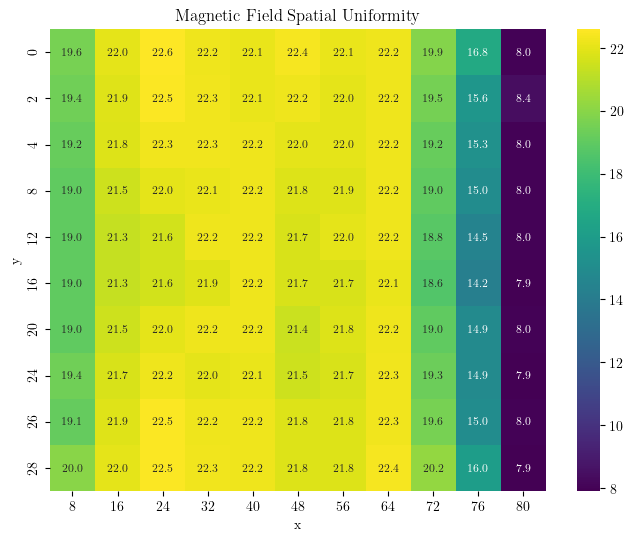

In [241]:
pivot_df = df_SpatialUniformity.pivot(index='y', columns='x', values='CampoMagnetico')

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_df,
    cmap='viridis',
    annot=True,
    fmt=".1f",  # Mostra 3 cifre decimali (puoi aumentare se vuoi)
    annot_kws={"size": 8}  # dimensione del testo
)
plt.title('Magnetic Field Spatial Uniformity')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Uniformità_Spaziale.png", dpi = 300)
plt.show()


In [226]:


x_2 =               [4,  4, 4, 4, 4, 4, 4, 4, 4, 4,
                     0,  0, 0, 0, 0, 0, 0, 0, 0, 0,
                   ]       # Asse lungo [cm]  


y_2 =               [28, 26, 24, 20, 16, 12, 8, 4, 2, 0,
                     28, 26, 24, 20, 16, 12, 8, 4, 2, 0,
                   
                   ]       # Asse corto [cm]

MagneticField_2 =   [17.2, 17.2,  17.2, 17.2, 17.0, 17.0, 17.2, 17.2, 17.1, 17.0, 
                     8.8, 9.8, 9.8, 10.0, 10.1, 10.0, 10.1, 9.8, 9.7, 8.7,
                  ]    # Gauss

In [227]:
df_SpatialUniformity_2 = pd.DataFrame({
    'x'             :  x_2,
    'y'             :  y_2,
    'CampoMagnetico':  MagneticField_2,
})

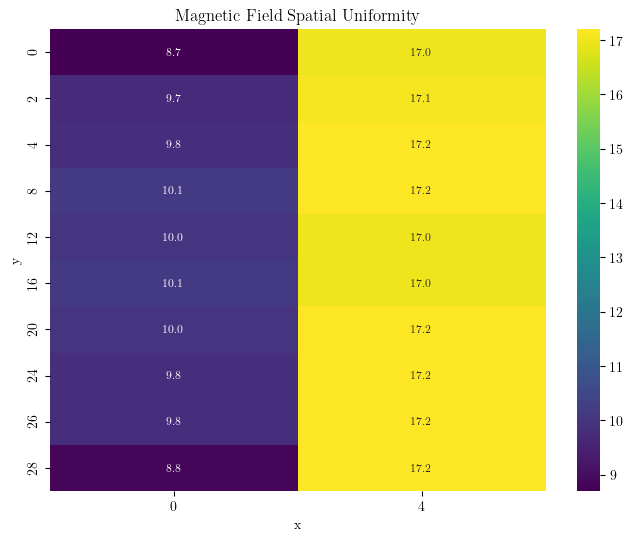

In [228]:
pivot_df = df_SpatialUniformity_2.pivot(index='y', columns='x', values='CampoMagnetico')

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_df,
    cmap='viridis',
    annot=True,
    fmt=".1f",  # Mostra 3 cifre decimali (puoi aumentare se vuoi)
    annot_kws={"size": 8}  # dimensione del testo
)
plt.title('Magnetic Field Spatial Uniformity')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
